Found 120 files belonging to 2 classes.
Using 96 files for training.
Found 120 files belonging to 2 classes.
Using 24 files for validation.
Class Names: ['fire_images', 'non_fire_images']
Epoch 1/20


C:\Users\ansar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5495 - loss: 1.4386 - val_accuracy: 0.5833 - val_loss: 0.8034
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 934ms/step - accuracy: 0.5000 - loss: 0.8685 - val_accuracy: 0.4167 - val_loss: 1.0779
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 977ms/step - accuracy: 0.6315 - loss: 0.5898 - val_accuracy: 0.6250 - val_loss: 0.6109
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8125 - loss: 0.5494 - val_accuracy: 0.6250 - val_loss: 0.5262
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 984ms/step - accuracy: 0.8464 - loss: 0.4536 - val_accuracy: 0.7917 - val_loss: 1.1521
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.9062 - loss: 0.3423 - val_accuracy: 0.7917 - val_loss: 0.7765
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 985ms/step - accuracy: 0.8633 - loss: 0.3403 - val_accuracy: 0.7917 - val_loss: 0.5169
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 982ms/step - accuracy: 0.8750 - loss: 0.2397 - val_accuracy: 0.8333 - val_loss: 0.4172
Epoch 9/20
3

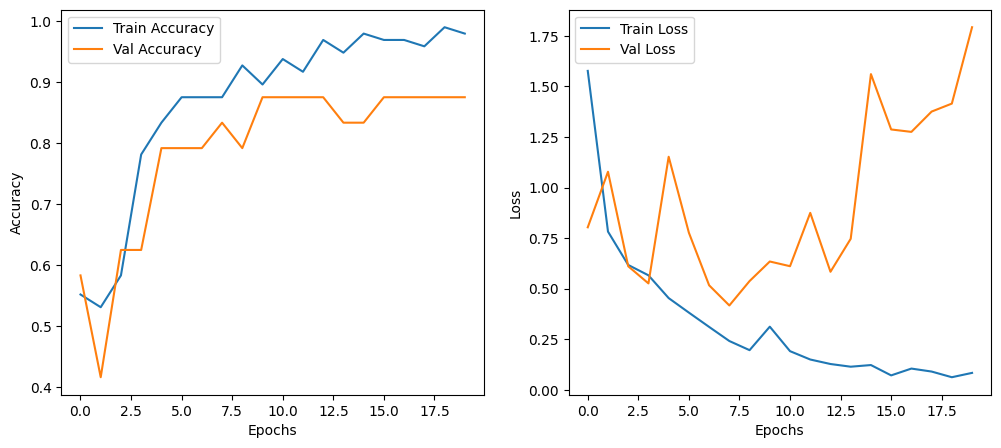

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

dataset_path = "fire_data/fire_dataset"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print("Class Names:", class_names)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

model1 = keras.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    
    layers.Dense(2, activation='softmax')
])

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

EPOCHS = 20
history = model1.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

model1.save("fire_detection_model1.keras") 
model1 = keras.models.load_model("fire_detection_model1.keras")

layers.Dense(3, activation='softmax') 


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [4]:
loss, accuracy = model1.evaluate(val_ds)
print(f"📊 Validation Accuracy: {accuracy:.4f}")
print(f"📉 Validation Loss: {loss:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step - accuracy: 0.8750 - loss: 1.7921
📊 Validation Accuracy: 0.8750
📉 Validation Loss: 1.7921


In [1]:
import cv2
import numpy as np

image_path = "fire_data/fire_dataset/fire_images/fire.24.png" 
img = cv2.imread(image_path)

if img is None:
    print("Error: Image not found! Check the path.")
else:
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    lower_bound = np.array([0, 50, 50])  
    upper_bound = np.array([50, 255, 255]) 

    mask = cv2.inRange(hsv, lower_bound, upper_bound)

    fire_percentage = (np.count_nonzero(mask) / mask.size) * 100

    if fire_percentage > 2:  
        print("🔥 Fire Detected! Fire Pixels:", fire_percentage, "%")
    else:
        print("✅ No Fire Detected. Fire Pixels:", fire_percentage, "%")
    cv2.imshow("Original Image", img)
    cv2.imshow("Fire Mask", mask)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


🔥 Fire Detected! Fire Pixels: 45.55439814814815 %


In [ ]:
import cv2
import numpy as np

# Start webcam
cap = cv2.VideoCapture(0)  # Use 0 for built-in camera, 1 for external

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define fire-like color range
    lower_bound = np.array([0, 50, 50])
    upper_bound = np.array([50, 255, 255])

    # Create fire mask
    mask = cv2.inRange(hsv, lower_bound, upper_bound)

    # Calculate fire pixel percentage
    fire_percentage = (np.count_nonzero(mask) / mask.size) * 100

    # Display fire detection result
    if fire_percentage > 2:  # Adjust threshold if needed
        label = "🔥 Fire Detected!"
        color = (0, 0, 255)  # Red
    else:
        label = "✅ No Fire"
        color = (0, 255, 0)  # Green

    cv2.putText(frame, f"{label} ({fire_percentage:.2f}%)", (30, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    # Show frame
    cv2.imshow("Live Fire Detection", frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
